In [1]:
import sys
# sys.path.append("..")

import numpy as np
np.seterr(divide="ignore")
import logging
import pickle
import glob
import pandas as pd
import os
import scipy as sp
import json

import itertools

# from sklearn.utils import check_random_state
# from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from scipy import interp

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)


import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

rcParams.update({'figure.autolayout': True})
# plt.rc('font', family='serif')

In [3]:
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
mpl.rc('axes',edgecolor='k')
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'

plt.rcParams['text.usetex'] = False
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

In [43]:
experiments_path = "/Users/laurengreenspan/GitDLs/TreeNiNNew/code_ginkgo/recnn/experiments/ginkgo"

learning_rate=2e-3
decay=0.9
batch_size=32
num_epoch=30
jet_number=800
Nfeatures=4
jet_algorithms = ['ptdesc','kt','antikt','truth']
hidden_dims=[20,40,80]

jet_algo = jet_algorithms[0]

params=[]
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []
val_bg_reject = []
for j, jet_algo in enumerate(jet_algorithms):
    for i,hidden_dim in enumerate(hidden_dims):

        subdir = '/ginkgo_'+str(jet_algo)+'_lr_'+str(learning_rate)+'_decay_'+str(decay)+'_batch_'+str(batch_size)+'_epochs_'+str(num_epoch)+'_hidden_'+str(hidden_dims[i])+'_Njets_'+str(jet_number)+'_features_'+str(Nfeatures)+'/run_0'

        with open(experiments_path+subdir+'/metrics_history.json') as f:
            data = json.load(f)


        print(data.keys())
        params.append((hidden_dim,jet_algo))
        train_loss.append(data['train_loss'])
        val_loss.append(data['val_loss'])
        train_accuracy.append(data['train_accuracy'])
        val_accuracy.append(data['val_accuracy'])
        val_bg_reject.append(data['val_bg_reject'])
    



dict_keys(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy', 'val_bg_reject'])
dict_keys(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy', 'val_bg_reject'])
dict_keys(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy', 'val_bg_reject'])


FileNotFoundError: [Errno 2] No such file or directory: '/Users/laurengreenspan/GitDLs/TreeNiNNew/code_ginkgo/recnn/experiments/ginkgo/ginkgo_kt_lr_0.002_decay_0.9_batch_32_epochs_30_hidden_20_Njets_800_features_4/run_0/metrics_history.json'

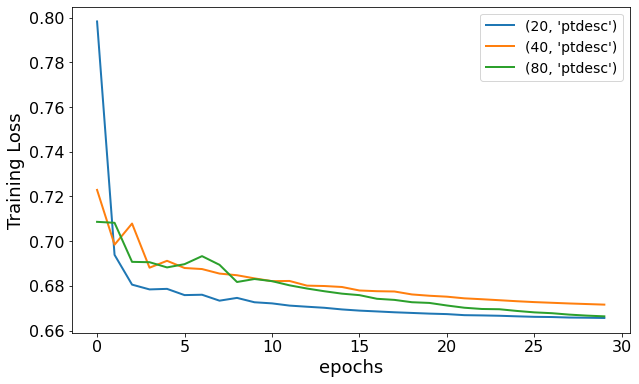

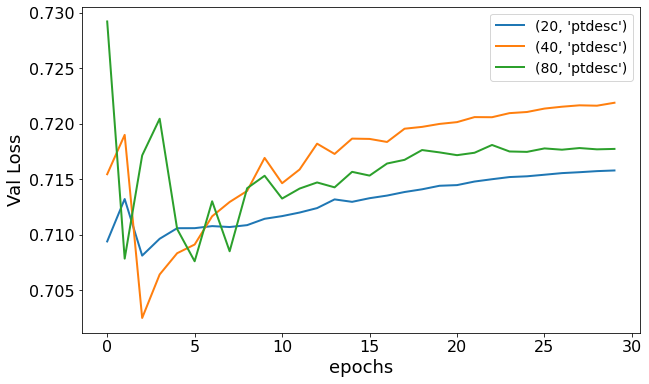

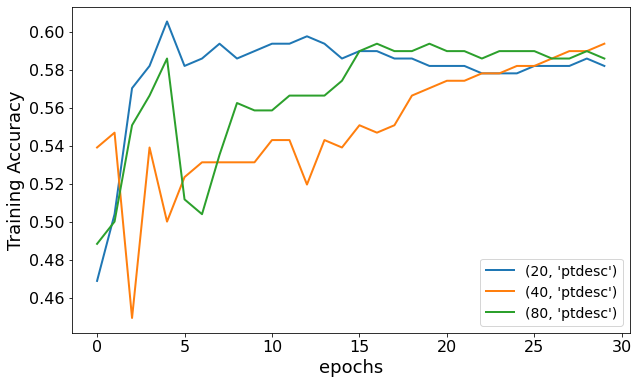

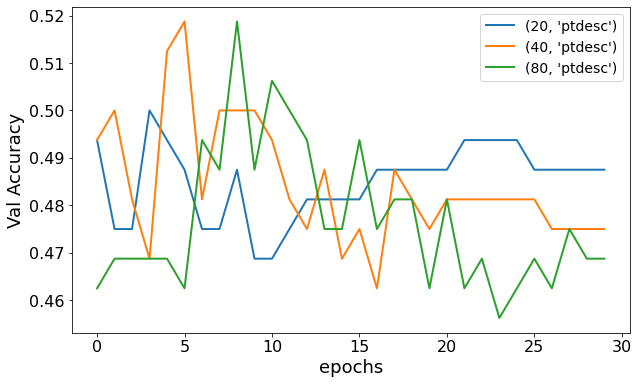

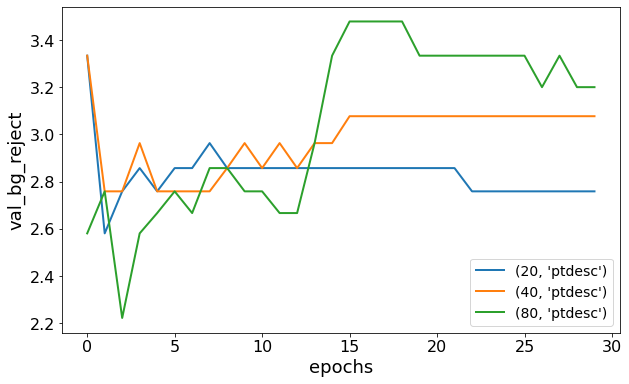

In [44]:
fig, ax = plt.subplots()
[ax.plot(train_loss[i],label = params[i]) for i in range(len(train_loss))]
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.legend()

fig, ax = plt.subplots()
[ax.plot(val_loss[i],label = params[i]) for i in range(len(val_loss))]
plt.xlabel('epochs')
plt.ylabel('Val Loss')
plt.legend()

fig, ax = plt.subplots()
[ax.plot(train_accuracy[i],label = params[i]) for i in range(len(train_accuracy))]
plt.ylabel('Training Accuracy')
plt.xlabel('epochs')
plt.legend()

fig, ax = plt.subplots()
[ax.plot(val_accuracy[i],label = params[i]) for i in range(len(val_accuracy))]
plt.ylabel('Val Accuracy')
plt.xlabel('epochs')
plt.legend()

fig, ax = plt.subplots()
[ax.plot(val_bg_reject[i],label = params[i]) for i in range(len(val_bg_reject))]
plt.ylabel('val_bg_reject')
plt.xlabel('epochs')
plt.legend()